In [1]:
import pandas as pd
import numpy as np
from string import punctuation
import pymorphy2
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import joblib
import ner


def row_cleaner(row, morphy, extractor):
    row.replace("\n", " ")
    row.replace("\t", " ")
    matches = extractor(row)
    for match in matches:

        tokens = match.tokens
        for token in tokens:
            row = row.replace(token.text, " ")

    for symbol in punctuation:
        row = row.replace(symbol, " ")
    row = row.lower()
    row = re.sub('\d', " ", row)
    sentence = []
    token = word_tokenize(row)
    for word in token:
        if len(word) < 3:
            continue
        if word.lower() not in ru_stop:
            sentence.append(morphy.parse(word.lower())[0].normal_form)
    return ' '.join(sentence)

extractor = ner.Extractor()
morph = pymorphy2.MorphAnalyzer()
ru_stop = stopwords.words('russian')

df = pd.read_json('train.json')
df = df[['sentiment', 'text']]


df['text'] = df['text'].apply(lambda row: row_cleaner(row, morph,extractor))

In [ ]:
df['category_id'] = df['sentiment'].factorize()[0]
category_id_df = df[['sentiment', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'sentiment']].values)

In [3]:
df

,sentiment,text,category_id
0,negative,досудебный расследование факт покупка енпф пак...,0
1,negative,медик рассказать состояние пострадавший мужчин...,0
2,negative,пройти год железнодорожный оператор запретить ...,0
3,negative,итог месяц год территория республика выпустить...,0
4,negative,ноябрь прота водейство коррупц выражать обес к...,0
5,negative,арест бывший министр национальный экономика ср...,0
6,negative,двое налётчик совершить нападение охранник бан...,0
7,negative,самрука энерго квартал вдвое снизить чистый пр...,0
8,negative,год половина коррупционный преступление систем...,0
9,negative,фигуранто дело коррупция упра лять директор ко...,0


In [5]:
df['text'][1]

'медик рассказать состояние пострадавший мужчина который совершить нападение возле отделение прокомментировать пресс служба управление здравоохранение место происшествие служба скора помощь обратиться двое человек один место оказать медицинский помощь госпитализация отказаться два пациент доставить больница скора неотложный помощь бснп сотрясение головной мозг ушибить голов состояние данный момент оцениваться близкий удовлетворительный пока проходить обследование больница сообщить управление здравоохранение напомнить пересечение улица возле алатау гранд произойти стрельба ориентировочно обеденный время здание расположить отделение банк настоящее время полицейский разыскивать подозревать стрельба факт нападение местный управление внутренний дело начать досудебный расследование статья разбой создать специальный следственно оперативный группа число опытный сотрудник подразделение криминальный полиция настоящий момент проводиться комплекс оперативный следственный мероприятие направить уста

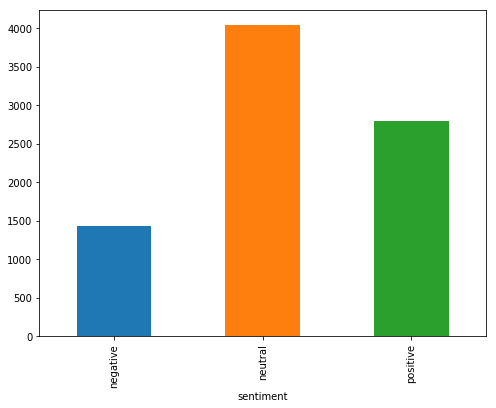

sentiment
negative    1434
neutral     4034
positive    2795
Name: text, dtype: int64

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('sentiment')['text'].count().plot.bar(ylim=0)
plt.show()
df.groupby('sentiment')['text'].count()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1,2))
features = tfidf.fit_transform(df.text)
labels = df.category_id
print(features.shape)

(8263, 107226)


In [13]:
from sklearn.feature_selection import chi2
N = 10
for Class, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Class))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'negative':
  . Most correlated unigrams:
. следственный
. факт
. подозревать
. уголовный
. расследование
. досудебный
. арест
. взятка
. арестовать
. задержать
  . Most correlated bigrams:
. тоо бузгул
. неоднократный лучение
. мера пресечение
. уголовный дело
. досудебный расследование
. размер группа
. лучение взятка
. взятка особо
. особо крупный
. крупный размер
# 'neutral':
  . Most correlated unigrams:
. интеграционный
. заседание
. тальго
. спорт
. казавтопром
. курс
. средневзвешенный
. вагон
. назначить
. поезд
  . Most correlated bigrams:
. usd eur
. скоростной поезд
. спец альност
. рот нвест
. год назначить
. заседание правительство
. президентский клуб
. потенциальный сделка
. официальный курс
. год работать
# 'positive':
  . Most correlated unigrams:
. сделка
. урок
. факт
. проверка
. скоростной
. должность
. суд
. задержать
. проект
. расследование
  . Most correlated bigrams:
. знести форум
. уголовный дело
. сотрудна чество
. социальный проект
. министр национальны

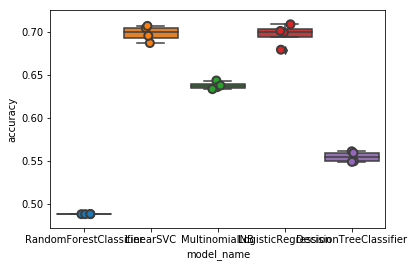

model_name
DecisionTreeClassifier    0.554761
LinearSVC                 0.698417
LogisticRegression        0.697085
MultinomialNB             0.637540
RandomForestClassifier    0.488200
Name: accuracy, dtype: float64

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
]
CV = 4
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
cv_df.groupby('model_name').accuracy.mean()

0.621621621622


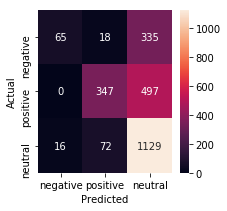

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.sentiment.values, yticklabels=category_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0.696248487293


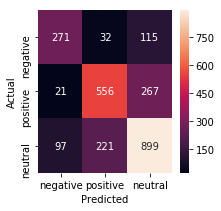

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.sentiment.values, yticklabels=category_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['sentiment'].unique()))

             precision    recall  f1-score   support

   negative       0.70      0.65      0.67       418
   positive       0.69      0.66      0.67       844
    neutral       0.70      0.74      0.72      1217

avg / total       0.70      0.70      0.70      2479

